<a href="https://colab.research.google.com/github/aaalqarni/Data-/blob/master/Sarcasm_BERT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/My Drive/group-5/Sarcasm/Dataset/Sarc_reddit_Khodak/main

/content/gdrive/.shortcut-targets-by-id/18jkhFxxAIhP43KeQN-eCjSicYYbVyecy/group-5/Sarcasm/Dataset/Sarc_reddit_Khodak/main


**SARC_Comments**

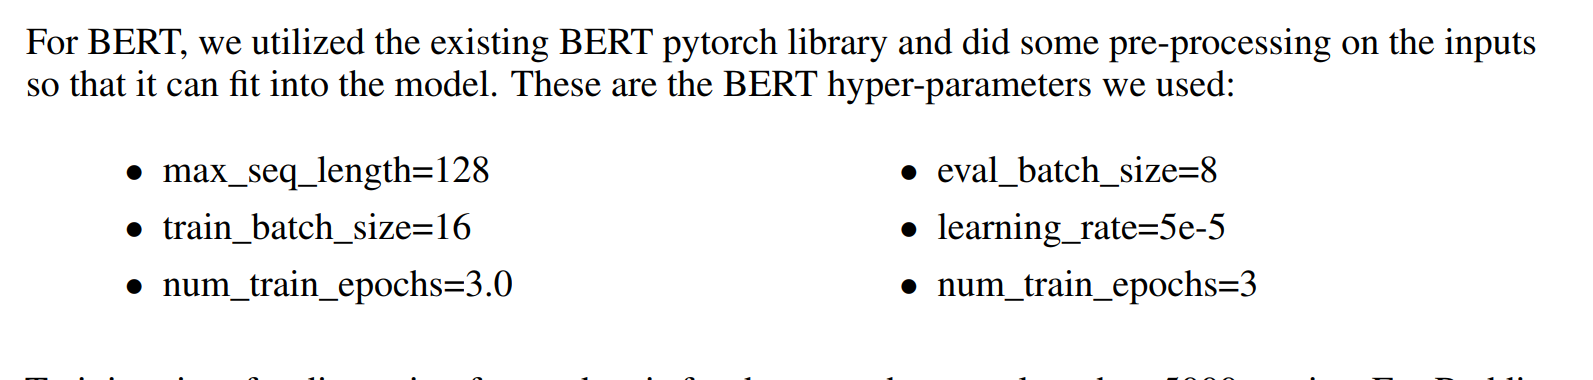

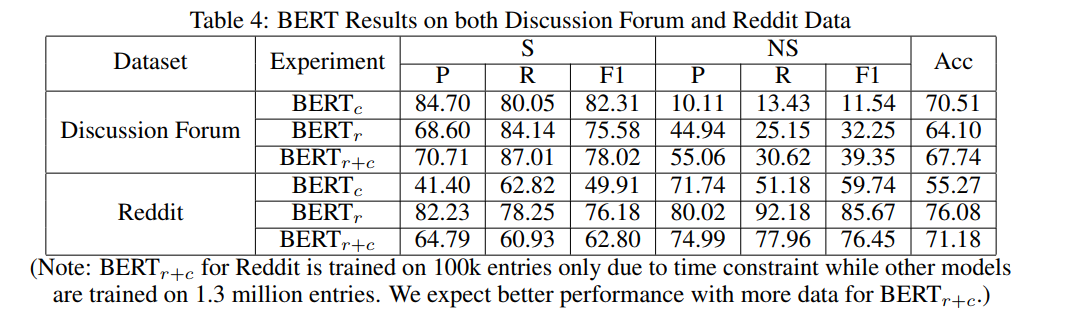

**Balnced CSV files**

In [7]:
%cd /content/gdrive/My Drive/group-5/Sarcasm/Dataset/Sarc_reddit_Khodak/

/content/gdrive/.shortcut-targets-by-id/18jkhFxxAIhP43KeQN-eCjSicYYbVyecy/group-5/Sarcasm/Dataset/Sarc_reddit_Khodak


In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
#--------------------------------
import scipy as sp 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from nltk.corpus import stopwords
from scipy.sparse import hstack
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import re
from sklearn.decomposition import TruncatedSVD
#from utils1 import *
import string
#from pattern.en import suggest
import snowballstemmer
import nltk
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('tagsets')
from sklearn import preprocessing

from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


import nltk

from nltk import pos_tag

from nltk.corpus import stopwords

from nltk.tokenize import WhitespaceTokenizer

from nltk.stem import WordNetLemmatizer


from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
%ls

 1309_36545_compressed_train-balanced-sarcasm.csv.zip
 authors.json
 authors.json.bz2
 Final_result.csv
 main/
 model_reddit_cased_save/
 model_REDDIT_large_cased_save/
 model_REDDIT_save/
 Multinomial_logit_Sarcasm.pkl
 Multinomial_Naive_Bayes.pkl
 Random_forest.pkl
'readme (1).gdoc'
 readme.gdoc
 readme.txt
 Reddit_bert_model/
 sarcasm_reddit_bert_model/
 stats.json
 stats.json.bz2
 SVM.pkl
 test-balanced.csv
 test-balanced-sarcasm.csv
 train-balanced-sarcasm.csv


In [9]:
Data = pd.read_csv("train-balanced-sarcasm.csv")
Data['comment']= Data['comment'].astype(str)

In [ ]:

Data.head()


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [10]:
Data.dtypes

label              int64
comment           object
author            object
subreddit         object
score              int64
ups                int64
downs              int64
date              object
created_utc       object
parent_comment    object
dtype: object

In [12]:
 
#[train_df['label'] == 1, 'comment']
Data['tokenized_comment'] =Data['comment'].str.split(" ") 
Data["length"] = Data["comment"].apply(lambda x: len(x))
Data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,tokenized_comment,length
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...","[NC, and, NH.]",10
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,"[You, do, know, west, teams, play, against, we...",74
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"[They, were, underdogs, earlier, today,, but, ...",121
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,"[This, meme, isn't, funny, none, of, the, ""new...",60
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,"[I, could, use, one, of, those, tools.]",31
...,...,...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,...","[I'm, sure, that, Iran, and, N., Korea, have, ...",92
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...,"[whatever, you, do,, don't, vote, green!]",34
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...,"[Perhaps, this, is, an, atheist, conspiracy, t...",66
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...,"[The, Slavs, got, their, own, country, -, it, ...",53


In [13]:
saracasm=Data[Data['label'] == 1]
non_saracasm=Data.loc[Data['label'] == 0]
saracasm.shape
non_saracasm.shape


(505413, 12)

In [14]:
# Length statistics for sarcasm
import numpy as np
print("max length with sarcasm label:",max(saracasm.length))
print("min length with sarcasm label:",min(saracasm.length))
print("mean length with sarcasm label:",np.mean(saracasm.length))

max length with sarcasm label: 9921
min length with sarcasm label: 1
mean length with sarcasm label: 56.44505186847192


In [15]:
# Length statistics for sarcasm
import numpy as np
print("max length with sarcasm label:",max(non_saracasm.length))
print("min length with sarcasm label:",min(non_saracasm.length))
print("mean length with sarcasm label:",np.mean(non_saracasm.length))

max length with sarcasm label: 10000
min length with sarcasm label: 1
mean length with sarcasm label: 56.93391543153817


In [ ]:
saracasm.length.count

<bound method Series.count of 33          35
44         145
45         107
66          67
69          65
          ... 
1010821     92
1010822     34
1010823     66
1010824     53
1010825     72
Name: length, Length: 505413, dtype: int64>

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(Data, test_size=0.2,random_state=42)
#train_data=Data

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808660 entries, 253939 to 121958
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   label              808660 non-null  int64 
 1   comment            808660 non-null  object
 2   author             808660 non-null  object
 3   subreddit          808660 non-null  object
 4   score              808660 non-null  int64 
 5   ups                808660 non-null  int64 
 6   downs              808660 non-null  int64 
 7   date               808660 non-null  object
 8   created_utc        808660 non-null  object
 9   parent_comment     808660 non-null  object
 10  tokenized_comment  808660 non-null  object
 11  length             808660 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 80.2+ MB


In [ ]:
train_data['label'].value_counts()

1    404347
0    404313
Name: label, dtype: int64

**Models**

In [ ]:
!pip install 'transformers==2.10'

In [ ]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf

In [ ]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
#train_data=pd.read_csv("train-balanced-sarcasm.csv")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


In [ ]:
print("Number of training examples {}".format(len(train_data)))
num_examples = 100
train = train_data.comment.values
labels = train_data.label.values
len(train)

Number of training examples 808660


808660

In [ ]:
from transformers import AlbertTokenizer, DistilBertTokenizer, BertTokenizer, ElectraTokenizer
from enum import Enum
class ModelChoice(Enum):
    BERT = 1
    DISTILBERT = 2
    ALBERT = 3
    ELECTRA = 4
    
MODEL_CHOICE = ModelChoice.DISTILBERT    


print('Loading tokenizer...')
if MODEL_CHOICE == ModelChoice.BERT:
    tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
elif MODEL_CHOICE == ModelChoice.DISTILBERT:
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased', do_lower_case=True)
elif MODEL_CHOICE == ModelChoice.ALBERT:
    tokenizer =  AlbertTokenizer.from_pretrained('albert-base-v2', do_lower_case=True) 
elif MODEL_CHOICE == ModelChoice.ELECTRA:
    tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator", do_lower_case=True)
else:
    print("Choose proper model!")


Loading tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', train[100])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train[100]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train[100])))

 Original:  Are those tits real?
Tokenized:  ['are', 'those', 't', '##its', 'real', '?']
Token IDs:  [1132, 1343, 189, 6439, 1842, 136]


In [ ]:
train_data.dtypes

label                 int64
comment              object
author               object
subreddit            object
score                 int64
ups                   int64
downs                 int64
date                 object
created_utc          object
parent_comment       object
tokenized_comment    object
length                int64
dtype: object

In [ ]:
train_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,tokenized_comment,length
253939,0,W. didn't.,fukton,politics,0,0,0,2016-07,2016-07-29 03:00:51,"Yes, that was a COURAGEOUS decision to snuff o...","[W., didn't.]",10
910324,0,If you walked into a store and set yourself on...,Kristofenpheiffer,news,1,1,0,2013-10,2013-10-23 15:52:19,"Yeah, but the thing is, if he tripped over his...","[If, you, walked, into, a, store, and, set, yo...",101
736956,1,"What an idiot, America is such a big country i...",hardlyausername,funny,-11,-11,0,2015-02,2015-02-07 02:35:55,Other side of the world....,"[What, an, idiot,, America, is, such, a, big, ...",89
956766,0,The race probably uses a ton less fuel that it...,mandrsn1,AskReddit,6,6,0,2012-02,2012-02-28 16:56:16,Does anyone else think that the amount of petr...,"[The, race, probably, uses, a, ton, less, fuel...",86
174583,0,Let the viral marketing commence!,Grimsik,Stargate,3,-1,-1,2016-10,2016-10-08 03:58:27,jason momoa is the best,"[Let, the, viral, marketing, commence!]",33


In [ ]:
print(train_data.comment.apply(lambda x: len(x)).quantile([0.9]))
MAX_LEN =128

0.9    109.0
Name: comment, dtype: float64


In [ ]:
MAX_SEQ_LENGTH =430
TRAIN_BATCH_SIZE =16
NUM_TRAIN_EPOCHS = 2

EVAL_BATCH_SIZE = 8
LEARNING_RATE = 5e-5


In [ ]:
%%time
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for comment in train:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        comment,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_SEQ_LENGTH,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train[10])
print('Token IDs:', input_ids[10])

Original:  Oh noes my reddit sting operation has been compromised.
Token IDs: tensor([  101,  9294,  1185,  1279,  1139,  1894, 17903, 17975,  2805,  1144,
         1151, 22485,   119,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
len(train)

808660

In [ ]:
print('Original: ', train[10])
print('Token IDs:', input_ids[10])

Original:  Oh noes my reddit sting operation has been compromised.
Token IDs: tensor([  101,  9294,  1185,  1279,  1139,  1894, 17903, 17975,  2805,  1144,
         1151, 22485,   119,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
#training & validation split
from torch.utils.data import TensorDataset, random_split


# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{} training samples'.format(train_size))
print('{} validation samples'.format(val_size))

646928 training samples
161732 validation samples


In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

# Set the seed value all over the place to make this reproducible.
import random
def set_random(seed_val):
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

In [ ]:
%%time
def train_model(train_dataloader, optimizer, epochs):
    
    # We'll store a number of quantities such as training and validation loss, 
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    # For each epoch...
    for epoch_i in range(0, epochs):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode. Don't be mislead--the call to 
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using the 
            # `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()        

            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
            loss, logits = model(b_input_ids, 
                                 attention_mask=b_input_mask, 
                                 labels=b_labels)

            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using 
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        

                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.
                (loss, logits) = model(b_input_ids, 
                                       attention_mask=b_input_mask,
                                       labels=b_labels)

            # Accumulate the validation loss.nb
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)


        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
    
    return training_stats

def print_training_stats(training_stats):
    # Display floats with two decimal places.
    pd.set_option('precision', 2)

    # Create a DataFrame from our training statistics.
    df_stats = pd.DataFrame(data=training_stats)

    # Use the 'epoch' as the row index.
    df_stats = df_stats.set_index('epoch')

    # A hack to force the column headers to wrap.
    #df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

    # Display the table.
    print(df_stats)

CPU times: user 20 µs, sys: 8 µs, total: 28 µs
Wall time: 32.7 µs


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup, AdamW

from transformers import AlbertForSequenceClassification,AlbertConfig
from transformers import DistilBertForSequenceClassification, AdamW, DistilBertConfig
from transformers import BertForSequenceClassification, BertConfig
from transformers import ElectraForSequenceClassification

# ADJUST lr_s and batch_sizes
lr_s = [5e-5]
batch_sizes = [16]
from itertools import product
hyperparameters = list(product(*[lr_s, batch_sizes]))
print(hyperparameters)
training_statistics = []
for lr, batch_size in hyperparameters:
 
    
    if MODEL_CHOICE == ModelChoice.BERT:
        #model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 2, output_attentions = False, output_hidden_states = False)
        
        model = BertForSequenceClassification.from_pretrained("bert-base-cased",num_labels = 2, output_attentions = False, output_hidden_states = False)

    elif MODEL_CHOICE == ModelChoice.DISTILBERT:
        model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-cased",num_labels = 2,output_attentions = False,output_hidden_states = False)
    elif MODEL_CHOICE == ModelChoice.ALBERT:
        model = AlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels = 2, output_attentions = False, output_hidden_states = False)
    elif MODEL_CHOICE == ModelChoice.ELECTRA:
        model = ElectraForSequenceClassification.from_pretrained("google/electra-base-discriminator",num_labels = 2, output_attentions = False, output_hidden_states = False)
    else:
        print("Choose proper model!")
    
    print(model)
   
    # Tell pytorch to run this model on the GPU.
    model.cuda()

    # The DataLoader needs to know our batch size for training, so we specify it 
    # here. For fine-tuning ALBERT on a specific task, the authors recommend a batch 
    # size of 16 or 32.

    # Create the DataLoaders for our training and validation sets.
    # We'll take training samples in random order. 
    train_dataloader = DataLoader(
                train_dataset,  # The training samples.
                sampler = RandomSampler(train_dataset), # Select batches randomly
                batch_size = batch_size # Trains with this batch size.
            )

    # For validation the order doesn't matter, so we'll just read them sequentially.
    validation_dataloader = DataLoader(
                val_dataset, # The validation samples.
                sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
                batch_size = batch_size # Evaluate with this batch size.
            )
    
    # Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
    # I believe the 'W' stands for 'Weight Decay fix"
    optimizer = AdamW(model.parameters(),
                      lr = lr, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                    )
    

    epochs = 2

    # Total number of training steps is [number of batches] x [number of epochs]. 
    # (Note that this is not the same as the number of training samples).
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                                num_warmup_steps = 0, # Default value in run_glue.py
                                                num_training_steps = total_steps)

    seed_val = 42
    set_random(seed_val)
    
    print("Training with hyperparameters: batch size={}, lr={}".format(batch_size, lr))
    training_stats = train_model(train_dataloader, optimizer, epochs)
    training_statistics.append(training_stats)
    print_training_stats(training_stats)

[(5e-05, 16)]
DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=

In [ ]:
for stat, hp in zip(training_statistics,hyperparameters) :
    print("lr={}, batch size={}".format(hp[0], hp[1]))
    df_stats = pd.DataFrame(data=stat[:4])

    # Use the 'epoch' as the row index.
    df_stats = df_stats.set_index('epoch')
    
    print(df_stats)
    print('-------------------')

lr=5e-05, batch size=16
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.53          0.5           0.76       0:47:18         0:03:08
2               0.46          0.5           0.76       0:47:04         0:03:08
-------------------


**Save Model**

In [ ]:
!ls

 1309_36545_compressed_train-balanced-sarcasm.csv.zip
 authors.json
 authors.json.bz2
 Bert_Sarcasm_test.pkl
 Final_result.csv
 main
 Multinomial_Sarcasm_test.pkl
'readme (1).gdoc'
 readme.gdoc
 readme.txt
 stats.json
 stats.json.bz2
 test-balanced.csv
 test-balanced-sarcasm.csv
 train-balanced-sarcasm.csv


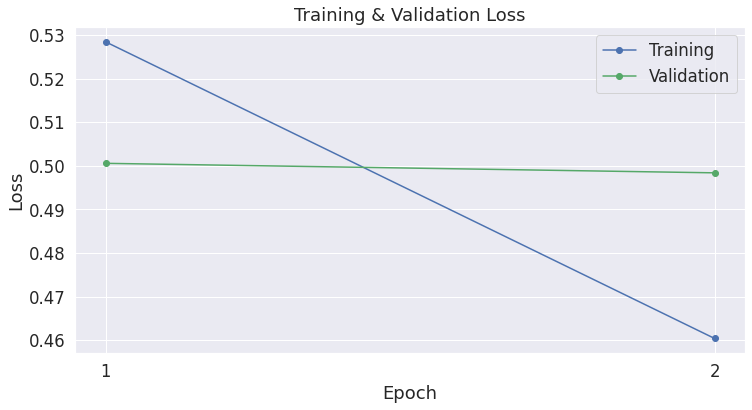

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2])

plt.show()

In [ ]:
import os

output_dir = './model_reddit_cased_save_02/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)



Saving model to ./model_reddit_cased_save_02/


('./model_reddit_cased_save_02/vocab.txt',
 './model_reddit_cased_save_02/special_tokens_map.json',
 './model_reddit_cased_save_02/added_tokens.json')

In [ ]:

gdrive_path = "./sarcasm_reddit_bert_model_02/"
# Create output directory if needed
if not os.path.exists(gdrive_path):
    os.makedirs(gdrive_path)

# Copy the model files to a directory in your Google Drive.
!cp -r ./model_reddit_cased_save/ "./sarcasm_reddit_bert_model_02/"

In [ ]:
# Load the dataset into a pandas dataframe.
#test_data = pd.read_csv('test-balanced.csv', sep='\t',header=None)
#test_data.columns=['label','comment','author','subreddit','score','ups','downs','date','created_utc','parent_comment']

In [ ]:
test_data["comment"].astype(str)

608627                   And he sure as hell is successful!
456977    wait, you have to win the candidates to challe...
803801    I mean how could anyone not see that it is ant...
926708    Funny thing, most of the girl pants I've bough...
129279    Also Ranch dressing, because LBJ was Texan, an...
                                ...                        
174840                                  Case IH Rowtrac FTW
270568    I totally expected it to be Ghandi when I clic...
395633                                             1s vs 2s
272896                           I posted a link in the OP?
775059                       Wouldn't want to be a *prude*!
Name: comment, Length: 202166, dtype: object

In [ ]:

# Report the number of sentences.
print('Number of test examples: {}'.format(len(test_data)))

# Create sentence and label lists
test = test_data.comment.values
labels = test_data.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    #print(sent)
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_LEN,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size =8

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test examples: 202166


In [ ]:
# Prediction on test set
import torch.nn.functional as F 
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, attention_mask=b_input_mask)
              
        
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  # Store predictions and true labels
  # Concatenate logits from each batch
  all_logits = torch.cat(outputs, dim=0)

  # Apply softmax to calculate probabilities
  probs = F.softmax(all_logits, dim=1).cpu().numpy()
  predictions.append(logits)
  true_labels.append(label_ids)
print('    DONE.')

Predicting labels for 202,166 test sentences...
    DONE.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print("F1 score: {}".format(precision_recall_fscore_support(flat_predictions, flat_true_labels, average='macro')))

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))

Accuracy: 0.7618837984626495


In [ ]:
from sklearn.metrics import f1_score,accuracy_score,average_precision_score,precision_score, recall_score
print("F1 score: {}".format(f1_score(flat_predictions, flat_true_labels, average='macro')))
average_precision = average_precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)))
precision=precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
recall=recall_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
print('precision-score: {0:0.2f}'.format(precision))
print('Recall-score: {0:0.2f}'.format(recall))
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))



NameError: ignored

In [ ]:
  from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(flat_predictions, flat_true_labels)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(flat_predictions, flat_true_labels)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:

evaluate_roc(probs,true_labels)

NameError: ignored

In [ ]:
pd.DataFrame(data=training_stats).to_csv('Final_result.csv', index=False)

Test Edmond's Data set

In [ ]:
%cd /content/gdrive/My Drive/group-5/

/content/gdrive/.shortcut-targets-by-id/18jkhFxxAIhP43KeQN-eCjSicYYbVyecy/group-5


In [ ]:
# Load the dataset into a pandas dataframe.
test_data =pd.read_csv("DQUBE_Processed.csv")

In [ ]:
valid_label=test_data[test_data.columns[13]]
Text=test_data[test_data.columns[11]]

In [ ]:

# Report the number of sentences.
print('Number of test examples: {}'.format(len(test_data)))

# Create sentence and label lists
test =Text.values
labels =  valid_label.values
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    #print(sent)
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_LEN,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size =8

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test examples: 200


In [ ]:
#Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, attention_mask=b_input_mask)
        
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  # Store predictions and true labels
  predictions.append(logits)
  all_logits = torch.cat(outputs, dim=0)

  # Apply softmax to calculate probabilities
  probs = F.softmax(all_logits, dim=1).cpu().numpy()
  true_labels.append(label_ids)
print('    DONE.')

Predicting labels for 200 test sentences...
    DONE.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print("F1 score: {}".format(precision_recall_fscore_support(flat_predictions, flat_true_labels, average='macro')))

F1 score: (0.3625, 0.5, 0.42028985507246375, None)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))

Accuracy: 0.725


In [ ]:
print("F1 score: {}".format(f1_score(flat_predictions, flat_true_labels, average='macro')))
average_precision = average_precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)))
precision=precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
recall=recall_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
print('precision-score: {0:0.2f}'.format(precision))
print('Recall-score: {0:0.2f}'.format(recall))
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))

F1 score: 0.42028985507246375
precision-score: 0.36
Recall-score: 0.50
Accuracy: 0.725


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.5000
Accuracy: 72.50%


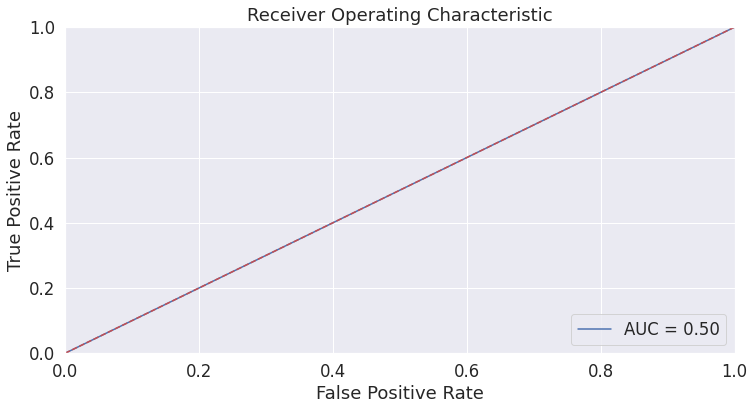

In [ ]:
evaluate_roc(probs,true_labels)

**Discussion Forums Datasets**

In [ ]:
%cd /content/gdrive/My Drive/group-5/Sarcasm/Dataset/sarcasm_v2_Oraby

/content/gdrive/.shortcut-targets-by-id/18jkhFxxAIhP43KeQN-eCjSicYYbVyecy/group-5/Sarcasm/Dataset/sarcasm_v2_Oraby


In [ ]:
test_data =pd.read_csv("GEN-sarc-notsarc.csv")



In [ ]:
test_data.head

<bound method NDFrame.head of         class    id                                               text
0     notsarc     1  If that's true, then Freedom of Speech is doom...
1     notsarc     2  Neener neener - is it time to go in from the p...
2     notsarc     3  Just like the plastic gun fear, the armour pie...
3     notsarc     4  So geology is a religion because we weren't he...
4     notsarc     5  Well done Monty. Mark that up as your first ev...
...       ...   ...                                                ...
6515     sarc  6516  depends on when the baby bird died.   run alon...
6516     sarc  6517  ok, sheesh, to clarify, women who arent aborti...
6517     sarc  6518  so..   eh??   hows this sound?   will it fly w...
6518     sarc  6519  I think we should put to a vote, the right of ...
6519     sarc  6520  You have a blob of tissue in your "but(sic)"? ...

[6520 rows x 3 columns]>

In [ ]:
test_data["class"].value_counts()

sarc       3260
notsarc    3260
Name: class, dtype: int64

In [ ]:
test_data["class"]=test_data["class"].astype(str)

sarcasm = {'sarc': 1,'notsarc': 0} 


test_data["class"] = [sarcasm[item] for item in test_data["class"]] 
#test_data["class"].replace(to_replace=['notsarc','sarc'], value=['1', '0'])

In [ ]:
test_data

,class,id,text
0,0,1,"If that's true, then Freedom of Speech is doom..."
1,0,2,Neener neener - is it time to go in from the p...
2,0,3,"Just like the plastic gun fear, the armour pie..."
3,0,4,So geology is a religion because we weren't he...
4,0,5,Well done Monty. Mark that up as your first ev...
...,...,...,...
6515,1,6516,depends on when the baby bird died. run alon...
6516,1,6517,"ok, sheesh, to clarify, women who arent aborti..."
6517,1,6518,so.. eh?? hows this sound? will it fly w...
6518,1,6519,"I think we should put to a vote, the right of ..."


In [ ]:
train_df,test_df =train_test_split(test_data ,train_size=80, 
                                                    random_state=42)

In [ ]:
train_df

,class,id,text
5225,0,5226,Yep. They're free to marry a member of the opp...
2613,1,2614,So you disagree with Zardoz then? True christi...
3461,1,3462,So if it was deemed by 'those with the knowled...
1021,0,1022,Actually it wasn't sitting somewhere since the...
3073,1,3074,"Ah yes, the 'Let's pull a smug and self servin..."
...,...,...,...
3772,1,3773,And lets not neglect the fact that he was teto...
5191,1,5192,person ( P ) Pronunciation Key (prsn) n. A...
5226,0,5227,Well... someone hasn't been following the camp...
5390,0,5391,"But the fact remains that guns are, by design,..."


In [ ]:
valid_label=train_df["class"]
Text=train_df["text"]

In [ ]:

# Report the number of sentences.
print('Number of test examples: {}'.format(len(test_data)))

# Create sentence and label lists
test =Text.values
labels = valid_label.values
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    #print(sent)
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 500,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 8  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

print("Training with hyperparameters: batch size={}, lr={}".format(batch_size, lr))
    training_stats = train_model(train_dataloader, optimizer, epochs)
    training_statistics.append(training_stats)
    print_training_stats(training_stats)

IndentationError: ignored

In [ ]:
#Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, attention_mask=b_input_mask)
        
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  #------------------------------------
  all_logits = torch.cat(outputs, dim=0)

  # Apply softmax to calculate probabilities
  probs = F.softmax(all_logits, dim=1).cpu().numpy()
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
print('    DONE.')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print("F1 score: {}".format(precision_recall_fscore_support(flat_predictions, flat_true_labels, average='macro')))

In [ ]:
print("F1 score: {}".format(f1_score(flat_predictions, flat_true_labels, average='macro')))
average_precision = average_precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)))
precision=precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
recall=recall_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
print('precision-score: {0:0.2f}'.format(precision))
print('Recall-score: {0:0.2f}'.format(recall))
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))

In [ ]:
evaluate_roc(probs,true_labels)

In [ ]:
for stat, hp in zip(training_statistics,hyperparameters) :
    print("lr={}, batch size={}".format(hp[0], hp[1]))
    df_stats = pd.DataFrame(data=stat[:4])

    # Use the 'epoch' as the row index.
    df_stats = df_stats.set_index('epoch')
    
    print(df_stats)
    print('-------------------')

lr=2e-05, batch size=32
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.51         0.48           0.77       0:43:20         0:01:25
2               0.44         0.47           0.77       0:43:24         0:01:25
3               0.39         0.50           0.77       0:43:23         0:01:25
-------------------
